In [2]:
import keras_cv

Using TensorFlow backend


In [3]:
import keras_core

ds = keras_core.utils.image_dataset_from_directory("frames/labeled_data/", image_size=(224,224))

Found 94980 files belonging to 2 classes.


2023-07-19 17:07:28.166104: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-19 17:07:28.166145: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-07-19 17:07:28.166155: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-07-19 17:07:28.166203: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-19 17:07:28.166240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [5]:
import tensorflow as tf
BATCH_SIZE = 32
IMAGE_SIZE = (224,244)
AUTOTUNE = tf.data.AUTOTUNE


def preprocess_inputs(image, label):
    return image, tf.one_hot(label, 2)

ds_f = (ds
      .shuffle(10 * BATCH_SIZE, reshuffle_each_iteration=True)
      .map(preprocess_inputs, num_parallel_calls=AUTOTUNE)
      .batch(BATCH_SIZE))

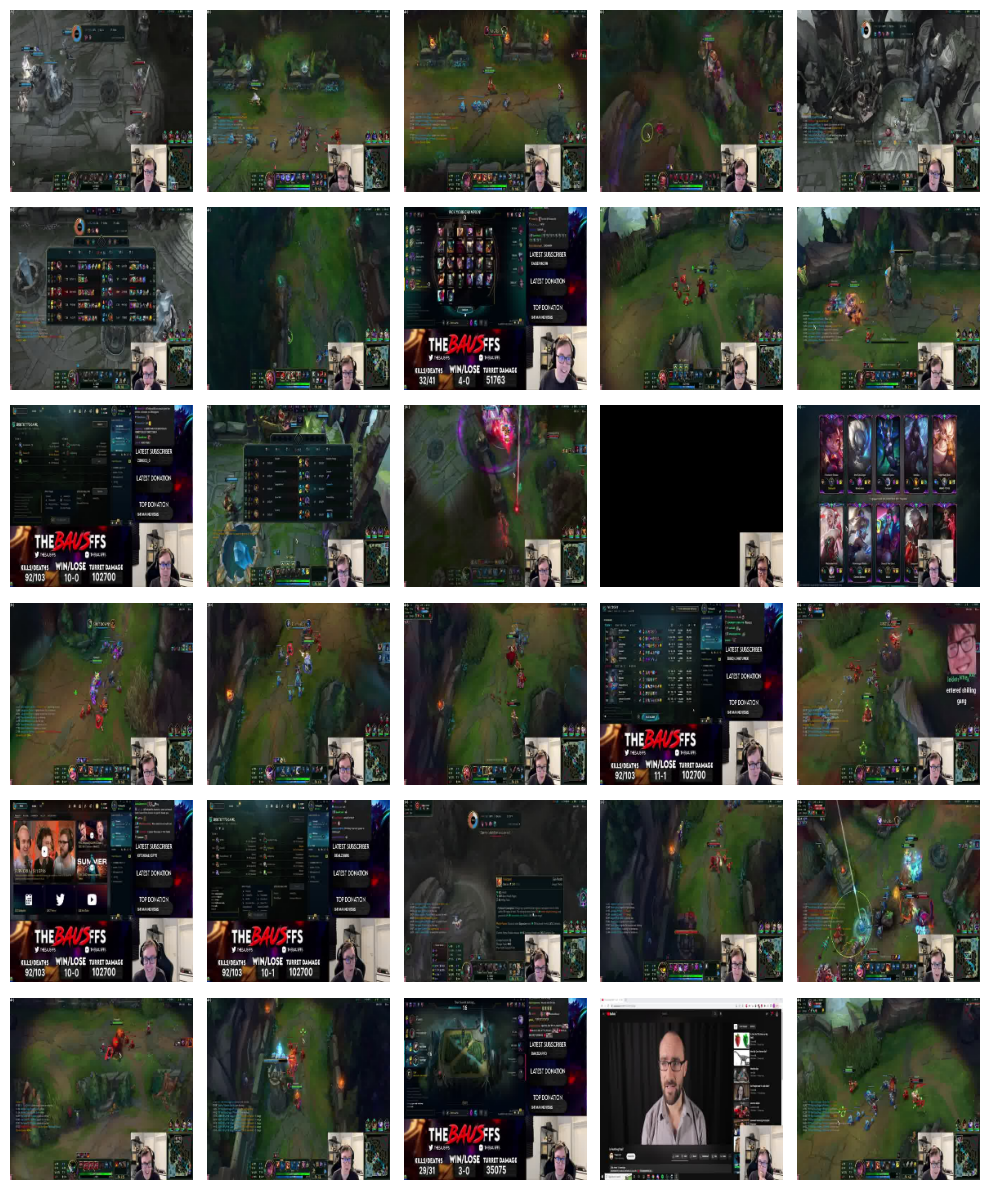

In [6]:
images = next(iter(ds.take(1)))[0]
keras_cv.visualization.plot_image_gallery(images, value_range=(0, 255))

In [9]:
model = keras_cv.models.ImageClassifier.from_preset(
    "resnet34", num_classes=1
)
model.compile(
    loss="binary_crossentropy",
    optimizer=tf.optimizers.legacy.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

In [10]:
model.fit(ds, epochs=1) # takes ~30m on 1 epoch, seems slower than fast.ai

2023-07-19 17:07:58.291892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  49/2969 [..............................] - ETA: 29:35 - loss: 0.2854 - accuracy: 0.0791

KeyboardInterrupt: 

In [ ]:
# ~30m to run..! Slow as hell and accuracy rises very slowly